In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


# plt.rc('font',family='Times New Roman') #设置全局字体
# plt.rc('font',family='Arial') #设置全局字体
# 设置图片清晰度
plt.rcParams['figure.dpi'] =200
plt.rcParams['font.family'] = "Arial"
# 保证能在Ai内编辑
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


D:\Soft\code_soft\anaconda\envs\rgis9\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:

tif_ISCCP = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_ISCCP_mask.tif")
tif_GLASS = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_GLASS_mask.tif")
tif_ERA5 = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_ERA5_mask.tif")
tif_MERRA2 = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_MERRA2_mask.tif")
tif_SSP245 = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_SSP245_mask.tif")
tif_SSP585 = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\0018_SSP585_mask.tif")


### 01图

In [ ]:
# 绘图
models = [tif_ISCCP, tif_GLASS, tif_ERA5, tif_MERRA2, tif_SSP245, tif_SSP585]
models_name = ['ISCCP-ITP', 'GLASS', 'ERA5', 'MERRA-2', 'SSP245', 'SSP585']
axs_num = ['a', 'b', 'c', 'd', 'e', 'f']
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
i = 1
scatter = None  # 初始化scatter变量以便后续使用
for model, ax, model_name, ax_num in zip(models, axs.flatten(), models_name, axs_num):
    data = model.read(1)
    # 标题
    ax.set_title(model_name, fontsize=12)

    data = np.ma.masked_where(data == model.nodata, data) # 将nodata值替换为NaN并创建掩码
    extent = [model.bounds.left, model.bounds.right, model.bounds.bottom, model.bounds.top] # 获取图像边界

    # 计算数据的第5和第95百分位数
    # 使用copy()方法创建一个可修改的数组副本
    vmin = np.percentile(data.compressed().copy(), 5)
    vmax = np.percentile(data.compressed().copy(), 95)
    # 可视化地图
    im = ax.imshow(data, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='Spectral_r',vmin=vmin, vmax=vmax)
    # im = ax.imshow(data, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='RdYlBu_r',vmin=vmin, vmax=vmax)
    # 海岸线
    ax.coastlines(resolution='50m', color='grey', linewidth=0.25)


    # 关闭 GeoTIFF
    # model.close()

    # 设置 axis ticks
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    # ax.tick_params(axis='both',direction='in' ,labelsize=11)
    ax.tick_params(axis='both', labelsize=8, length=0) # 隐藏刻度线
    ax.grid(linewidth=0.2, color='#949494', linestyle='--', zorder=0) # 格网

    # 设置 tick labels
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='x', which='major', pad=8) # axis='x' 表示应用于X轴，axis='y' 表示应用于Y轴，which='major' 表示应用于主刻度

    # 添加colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical',pad=-0.01, extend="both")
    cbar.ax.tick_params(labelsize=8) # 设置刻度标签字体大小
    # 将 vmin 和 vmax 调整为最近的 5 的倍数
    vmin_rounded = np.ceil(vmin / 5) * 5  # 向上取整到最近的 5 的倍数
    vmax_rounded = np.floor(vmax / 5) * 5   # 向下取整到最近的 5 的倍数
    # 在调整后的范围中生成 4 个等间距的刻度值（确保它们是 5 的倍数）
    ticks = np.linspace(vmin_rounded, vmax_rounded, 4)
    # 设置色带的刻度位置和标签
    cbar.set_ticks(ticks)
    cbar.set_ticklabels([f'{int(t)}' for t in ticks])  # 确保标签是整数形式

    if i in [2, 4, 6]:
        cbar.set_label("Radiation (W/m²)", fontsize=10)

    i += 1


# fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap="Spectral_r"), ax=axs, pad=0.01, orientation='vertical', aspect=30, alpha=0.8, label='Density')
# 保存为矢量
# fig.savefig('figs/01产品可视化图.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### 02图

In [ ]:
# 绘图
models = [tif_ISCCP, tif_GLASS, tif_ERA5, tif_MERRA2, tif_SSP245, tif_SSP585]
models_name = ['ISCCP-ITP', 'GLASS', 'ERA5', 'MERRA-2', 'SSP245', 'SSP585']
axs_num = ['a', 'b', 'c', 'd', 'e', 'f']
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(3, 6))
i = 1
for model, ax, model_name, ax_num in zip(models, axs.flatten(), models_name, axs_num):
    # 标题
    # ax.set_title(model_name, fontsize=12)

    data = model.read(1)
    data = np.ma.masked_where(data == model.nodata, data) # 将nodata值替换为NaN并创建掩码

    # 计算纬度平均（X轴）
    latitude_avg = np.mean(data, axis=1)
    latitude_avg_reversed = np.flip(latitude_avg)
    mean_value = np.mean(latitude_avg_reversed) # 平均的平均
    # 生成纬度数组（Y轴）
    latitudes = np.linspace(-90, 90, data.shape[0])

    # 计算每个纬度上数据的标准差
    latitude_std = np.std(data, axis=1)
    latitude_std_reversed = np.flip(latitude_std)
    # 计算置信区间-90：1.645，95：1.96，99：
    z_score = 1.96  # 95% 置信区间的 z 分数
    lower_bound = latitude_avg_reversed - z_score * latitude_std_reversed
    upper_bound = latitude_avg_reversed + z_score * latitude_std_reversed


    # 绘制折线图
    # ax.plot(latitude_avg_reversed, latitudes, color='#e26a66', linewidth=1)
    ax.plot(latitude_avg_reversed, latitudes, color='#69c3a5', linewidth=1)
    # 添加平均值线# ccddef
    # ax.axvline(x=mean_value, color='#3880b9', linestyle='--', alpha=0.6, linewidth=1)
    ax.axvline(x=mean_value, color='#fdb365', linestyle='--', alpha=0.8, linewidth=1)
    # 填充 95% 置信区间 #c6e89f
    # ax.fill_betweenx(latitudes, lower_bound, upper_bound, color='#fae3e1', alpha=0.9)
    ax.fill_betweenx(latitudes, lower_bound, upper_bound, color='#c6e89f', alpha=0.5)



    ax.yaxis.tick_right() # 将 Y 轴设置在右侧
    ax.set_ylim(-90, 90) # 设置折线图的 Y 轴范围与地图一致
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90]) # 设置Y轴刻度
    ax.set_yticklabels([]) # 隐藏Y轴刻度标签
    ax.tick_params(axis='both',direction="in", labelsize=8) # 刻度线朝内

    # 设置 X 轴刻度标签为数据的最低值、平均值、最高值
    x_ticks = [np.ceil(np.min(latitude_avg_reversed) / 5)*5, int(mean_value), np.floor(np.max(latitude_avg_reversed) / 5)*5]
    ax.set_xticks(x_ticks)

    if i==2:
        # 设置 X 轴刻度标签为数据的最低值、平均值、最高值
        x_ticks = [np.ceil(np.min(latitude_avg_reversed) / 5)*5-40, int(mean_value)+6, np.floor(np.max(latitude_avg_reversed) / 5)*5]
        ax.set_xticks(x_ticks)

    # 添加图例
    ax.legend(['SDR', 'Mean','95%CI'], loc='upper right', fontsize=6, frameon=False, bbox_to_anchor=(1.02, 1))


    i += 1


# fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=1), cmap="Spectral_r"), ax=axs, pad=0.01, orientation='vertical', aspect=30, alpha=0.8, label='Density')
# 保存为矢量
# fig.savefig('figs/02纬度折线图.pdf', format='pdf', dpi=1000, bbox_inches='tight')

### 04图

In [2]:
# 读取数据
tif_GLASS2019 = rasterio.open(r"D:\PhD\UCAS\Undergraduate\Projects\Python\2000_2018_year_avg\mask\2019_GLASS_mask.tif")

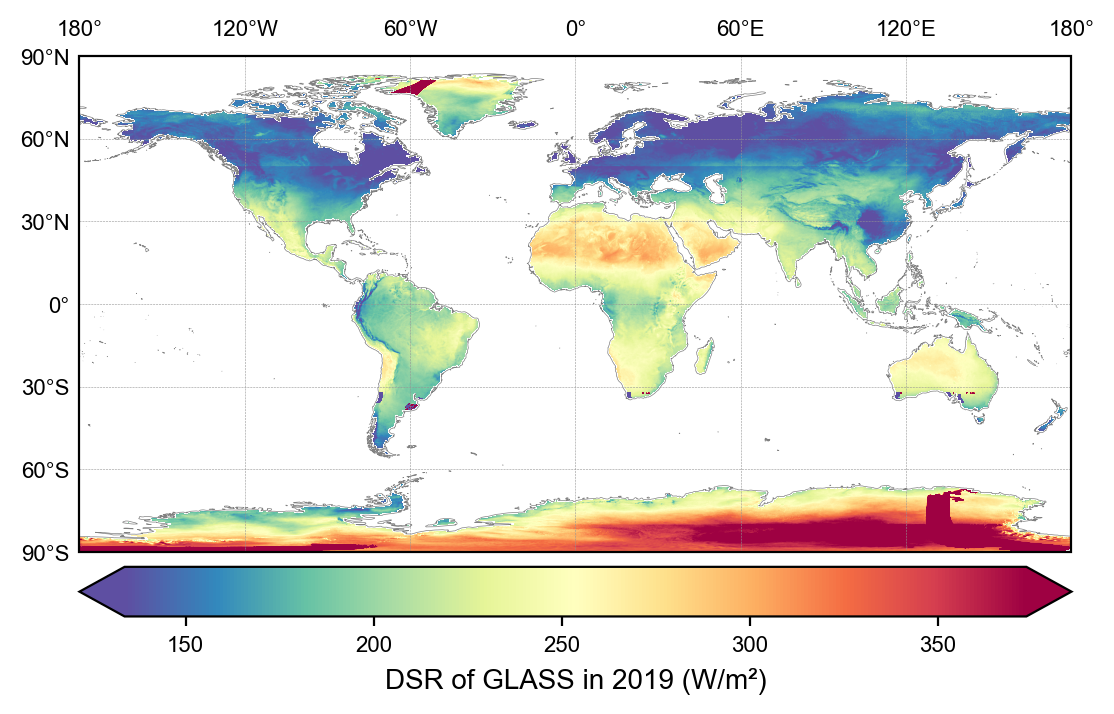

In [19]:
# 绘图

model_name = 'GLASS'
# fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

model = tif_GLASS2019
data = model.read(1)
# 标题
# ax.set_title(model_name, fontsize=12)

data = np.ma.masked_where(data == model.nodata, data) # 将nodata值替换为NaN并创建掩码
extent = [model.bounds.left, model.bounds.right, model.bounds.bottom, model.bounds.top] # 获取图像边界

# 计算数据的第5和第95百分位数
# 使用copy()方法创建一个可修改的数组副本
vmin = np.percentile(data.compressed().copy(), 5)
vmax = np.percentile(data.compressed().copy(), 95)

# 可视化地图
im = ax.imshow(data, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='Spectral_r',vmin=vmin, vmax=vmax)
# im = ax.imshow(data, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='Spectral_r')
# 海岸线
ax.coastlines(resolution='50m', color='grey', linewidth=0.25)

# 关闭 GeoTIFF
# model.close()

# 设置 axis ticks
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
# ax.tick_params(axis='both',direction='in' ,labelsize=11)
ax.tick_params(axis='both', labelsize=8, length=0) # 隐藏刻度线
ax.grid(linewidth=0.2, color='#949494', linestyle='--', zorder=0) # 格网

# 设置 tick labels
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(axis='x', which='major', pad=6) # axis='x' 表示应用于X轴，axis='y' 表示应用于Y轴，which='major' 表示应用于主刻度
ax.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False) # 将 X 轴标签设置在上方

# 添加colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', extend="both", pad=0.02)
# cbar = plt.colorbar(im, ax=ax, orientation='vertical',pad=0.05)
cbar.ax.tick_params(labelsize=8) # 设置刻度标签字体大小
# 将 vmin 和 vmax 调整为最近的 5 的倍数
# vmin_rounded = np.ceil(vmin / 5) * 5  # 向上取整到最近的 5 的倍数
# vmax_rounded = np.floor(vmax / 5) * 5   # 向下取整到最近的 5 的倍数
# 在调整后的范围中生成 4 个等间距的刻度值（确保它们是 5 的倍数）
# ticks = np.linspace(vmin_rounded, vmax_rounded, 4)
# 设置色带的刻度位置和标签
# cbar.set_ticks(ticks)
# cbar.set_ticklabels([f'{int(t)}' for t in ticks])  # 确保标签是整数形式
cbar.set_label("DSR of GLASS in 2019 (W/m²)", fontsize=10)

# 保存为矢量
fig.savefig('figs/04-1GLASS2019.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [20]:
# 提取异常区域
E1 = data[0:600, 2400:3600]
E1_pd = pd.Series(E1.flatten())
E2 = data[3000:3600, 0:1200]
E2_pd = pd.Series(E2.flatten())
E3 = data[3000:3600, 4800:6000]
E3_pd = pd.Series(E3.flatten())
E4 = data[3000:3600, 6000:7200]
E4_pd = pd.Series(E4.flatten())
# 作为列组合到一个pd
E = pd.concat([E1_pd, E2_pd, E3_pd, E4_pd], axis=1)

In [21]:
t = np.array(E)
# 将每一列转换为列表里的 ndarray，并删除nan
t_list = [t[:, i][~np.isnan(t[:, i])] for i in range(t.shape[1])]


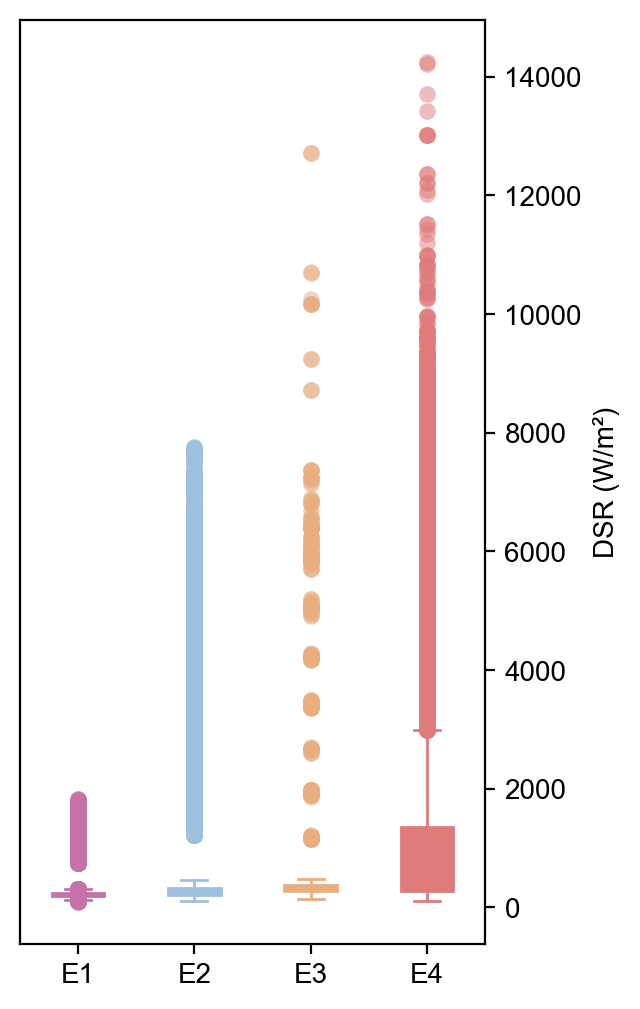

In [25]:
labels = ['E1', 'E2', 'E3', 'E4']
# 设置箱体颜色
colors = ['#c472a8', '#9ec0df', '#e8ae80', '#e07b7c']
whisker_colors = ['#c472a8', '#c472a8', '#9ec0df', '#9ec0df', '#e8ae80', '#e8ae80', '#e07b7c', '#e07b7c']

fig, ax = plt.subplots(figsize=(3,6))

# 绘制箱线图
bplot = ax.boxplot(t_list, patch_artist=True, tick_labels=labels)

for box, median, flier, color in zip(bplot['boxes'], bplot['medians'], bplot['fliers'], colors):
    median.set_linewidth(0)  # 隐藏中位线
    box.set_edgecolor(color) # 设置箱体边框颜色
    box.set_facecolor(color) # 设置箱体填充颜色

    flier_color = tuple(int(color[i:i+2], 16)/255 for i in (1, 3, 5)) + (0.5,)  # 设置透明度为 0.5
    flier.set_markerfacecolor(flier_color)  # 设置异常值颜色
    # flier.set_markerfacecolor(color) # 设置异常值颜色
    flier.set_markeredgewidth(0) # 设置异常值边框



for whisker, cap, color in zip(bplot['whiskers'], bplot['caps'], whisker_colors):
    whisker.set_color(color) # 设置须的颜色
    cap.set_color(color)     # 设置须帽的颜色

ax.yaxis.tick_right() # 将 Y 轴设置在右侧
ax.set_ylabel('DSR (W/m²)')
ax.yaxis.set_label_position("right") # 将 y 轴标签移动到右侧


# 保存为矢量
fig.savefig('figs/04-2异常区域箱线图.pdf', format='pdf', dpi=1000, bbox_inches='tight')
plt.show()